![QuestionOne](images/q1.png)

1) df(x)/dx = -2*x + 0.45*exp(0.45*x)
   As shown below, the zero slope points are at x = [0.252020270830005, 7.91087352254695]


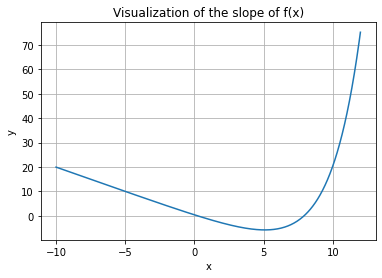

2) Using scipy, the roots are 0.25202027083001505 7.910873522546641


In [19]:
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sp
import numpy as np

x = sp.Symbol('x')
f = sp.exp(0.45*x)-sp.Pow(x,2)+5
d_f = sp.diff(f, x, 1)

sp.pprint(f"1) df(x)/dx = {d_f}")
print(f"   As shown below, the zero slope points are at x = {sp.solve(d_f,x)}")

df = sp.lambdify(x, d_f)
x_ = np.linspace(-9.99,11.99,500)
y_ = [df(x_r) for x_r in x_]

plt.plot(x_, y_)
plt.title("Visualization of the slope of f(x)")
plt.xlabel("x"); plt.ylabel("y");
plt.grid()
plt.show()

# Only gives one root
root_one = optimize.root_scalar(df, bracket=[0, 2], method='brentq').root
root_two = optimize.root_scalar(df, bracket=[5, 9], method='brentq').root
print(f"2) Using scipy, the roots are {root_one} {root_two}")


![QuestionTwo](images/q2.png)

The zeros are [1.77766259 3.00667383]


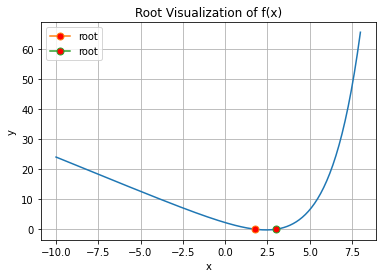

In [25]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

def f(x):
    return 1.2*np.exp(0.53*x)-2.3*x+1.01

x = np.linspace(-9.99,7.99,200)

sol = optimize.root(f, [0, 5])
print(f"The zeros are {sol.x}")

plt.plot(x, f(x))
for root in sol.x:
    plt.plot(
        root, 
        f(root), 
        marker="o", 
        markersize=7, 
        markerfacecolor="red", 
        label="root"
    )

plt.title("Root Visualization of f(x)")
plt.xlabel("x"); plt.ylabel("y");
plt.grid(); plt.legend(); plt.show();

![QuestionThree](images/q3.png)

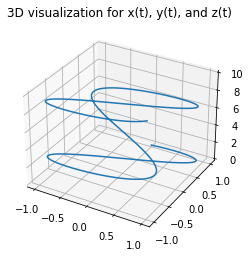

The arclength is: 18.325723697385587


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

t = np.linspace(0,10,500)
x_t = np.sin(2*t)
y_t = np.cos(t)
z_t = t

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# plotting
ax.plot3D(x_t, y_t, z_t)
ax.set_title('3D visualization for x(t), y(t), and z(t)')
plt.show()

t = sp.symbols('t', positive=True)
length = sp.lambdify(t, sp.integrate((4*sp.Pow(sp.cos(2*t), 2) + sp.Pow(sp.sin(t), 2) + 1)**0.5, (t,0,10)))
print(f"The arclength is: {length(10)}")


![QuestionFour](images/q4.png)

In [13]:
from scipy import integrate 
f = lambda z,y,x: x*y*z**2
#f_volume = integrate.tplquad(f, 0, 3, 0, 1, 0, lambda x, y: 1-y) 
f_volume = integrate.tplquad(f, 0, 1, lambda x: 0, lambda x: 1-x, lambda x, y: 0, lambda x, y: 3) 
print(f"The prism volume is = {f_volume[0]}") 

The prism volume is = 0.375


![QuestionFive](images/q5.png)

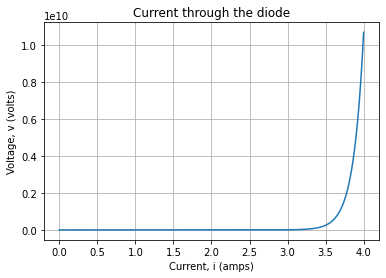

KeyboardInterrupt: 

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def i(v):
    return 0.001*(np.exp(7.5*v) - 1.1)
v = np.linspace(0,4,200)

plt.plot(v, i(v))
plt.title("Current through the diode")
plt.xlabel("Current, i (amps)")
plt.ylabel("Voltage, v (volts)")
plt.grid()
plt.show()

# vb = np.linspace(-10,10,200)
v, b = sp.symbols("v b")
# equation = sp.Eq(vb, 120*(0.001*(sp.exp(7.5*v) - 1.1)) + v)
sp.solve(sp.Eq(b, 120*(0.001*(sp.exp(7.5*v) - 1.1)) + v), v)


![QuestionSix](images/q6.png)

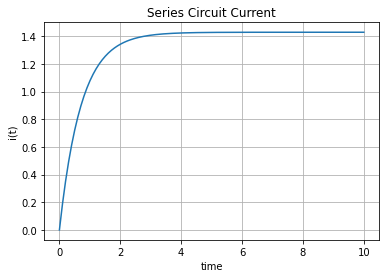

In [7]:
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import numpy as np 

def didt(i,t, L=0.5, R=0.7): 
    return -R*i/L + 1/L
  
# initial condition 
i0 = 0
  
# values of time 
t = np.linspace(0,10,200) 
  
# solving ODE 
i = odeint(didt, i0, t) 
  
# plot results 
plt.plot(t,i) 
plt.title("Series Circuit Current")
plt.xlabel("time") 
plt.ylabel("i(t)") 
plt.grid()
plt.show()

![QuestionSeven](images/q7.png)

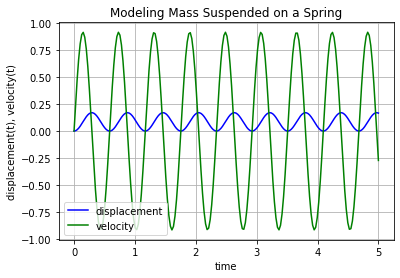

In [4]:
# How come k/M = 100 if k = 150N/m, M = 1.3kg?
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def rightSideODE(x, t, k, m):
    """
    Parameters
    ----------
        x[0] = x, x[1] = dx/dt

    Returns
    -------
        dxdt[0] = dx/dt, dxdt[1] = d2x/dt2
    """
    dxdt = [x[1], (-k/m)*x[0] + 9.8]
    return dxdt

# set the initial conditions... x[0] = x, x[1] = dx/dt
x0 = [0, 0]

# define time
t = np.linspace(0,5,200)

# define the constants
m = 1.3
k = 150

solution = odeint(rightSideODE, x0, t, args=(k, m))

plt.plot(t, solution[:,0], 'b', label='displacement')
plt.plot(t, solution[:,1], 'g', label='velocity')
plt.title("Modeling Mass Suspended on a Spring")
plt.xlabel('time')
plt.ylabel('displacement(t), velocity(t)')
plt.legend()
plt.grid()
plt.show()